In [23]:
!pip install yfinance --upgrade --no-cache-dir
!pip install matplotlib --upgrade --no-cache-dir



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 124.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [24]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [25]:
forex_pair = 'EURUSD=X'
indian_stock = 'TATAMOTORS.NS'

In [26]:
forex_data = yf.download(forex_pair, start='2024-01-01', end='2024-07-18')
indian_data = yf.download(indian_stock, start='2024-01-01', end='2024-07-18')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [27]:
forex_returns = forex_data['Close'].pct_change()
indian_returns = indian_data['Close'].pct_change()

In [28]:
spread = forex_returns - indian_returns

In [29]:
mean_spread = spread.mean()
std_spread = spread.std()
z_score_threshold = 2

In [30]:
def generate_signals(spread, mean_spread, std_spread, z_score_threshold):
    signals = []
    for i in range(len(spread)):
        z_score = (spread[i] - mean_spread) / std_spread
        if z_score > z_score_threshold:
            signals.append(-1)  # Sell signal
        elif z_score < -z_score_threshold:
            signals.append(1)  # Buy signal
        else:
            signals.append(0)  # No signal
    return signals

In [31]:
signals = generate_signals(spread, mean_spread, std_spread, z_score_threshold)

<ipython-input-30-4511ee6b474b>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z_score = (spread[i] - mean_spread) / std_spread


In [32]:
def execute_trades(signals, forex_data, indian_data):
    trades = []
    for i in range(len(signals)):
        if signals[i] == 1:
            # Buy the Indian stock and sell the Forex pair
            trades.append({'Type': 'Buy', 'Stock': indian_stock, 'Forex': forex_pair, 'Date': forex_data.index[i]})
        elif signals[i] == -1:
            # Sell the Indian stock and buy the Forex pair
            trades.append({'Type': 'Sell', 'Stock': indian_stock, 'Forex': forex_pair, 'Date': forex_data.index[i]})
    return trades

In [33]:
trades = execute_trades(signals, forex_data, indian_data)

In [34]:
print(trades)

[{'Type': 'Buy', 'Stock': 'TATAMOTORS.NS', 'Forex': 'EURUSD=X', 'Date': Timestamp('2024-02-05 00:00:00')}, {'Type': 'Sell', 'Stock': 'TATAMOTORS.NS', 'Forex': 'EURUSD=X', 'Date': Timestamp('2024-03-13 00:00:00')}, {'Type': 'Sell', 'Stock': 'TATAMOTORS.NS', 'Forex': 'EURUSD=X', 'Date': Timestamp('2024-05-13 00:00:00')}, {'Type': 'Sell', 'Stock': 'TATAMOTORS.NS', 'Forex': 'EURUSD=X', 'Date': Timestamp('2024-06-04 00:00:00')}]


In [35]:
df = pd.DataFrame(trades)

In [36]:
df

,Type,Stock,Forex,Date
0,Buy,TATAMOTORS.NS,EURUSD=X,2024-02-05
1,Sell,TATAMOTORS.NS,EURUSD=X,2024-03-13
2,Sell,TATAMOTORS.NS,EURUSD=X,2024-05-13
3,Sell,TATAMOTORS.NS,EURUSD=X,2024-06-04


In [37]:
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

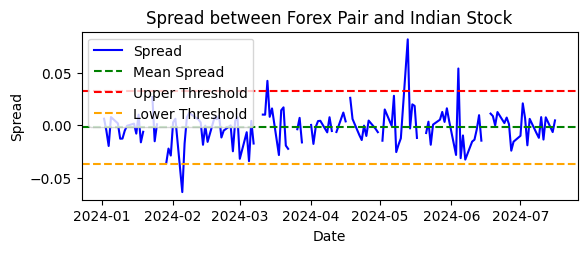

In [38]:
plt.subplot(2, 1, 1)
plt.plot(spread.index, spread, label='Spread', color='blue')
plt.axhline(mean_spread, color='green', linestyle='--', label='Mean Spread')
plt.axhline(mean_spread + z_score_threshold * std_spread, color='red', linestyle='--', label='Upper Threshold')
plt.axhline(mean_spread - z_score_threshold * std_spread, color='orange', linestyle='--', label='Lower Threshold')
plt.title('Spread between Forex Pair and Indian Stock')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()

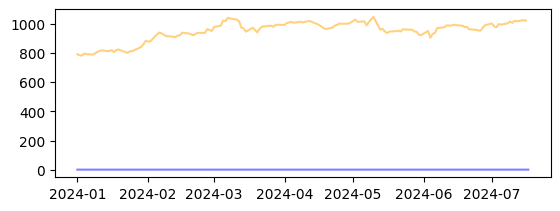

In [39]:
plt.subplot(2, 1, 2)
plt.plot(forex_data.index, forex_data['Close'], label='Forex Pair Price', color='blue', alpha=0.5)
plt.plot(indian_data.index, indian_data['Close'], label='Indian Stock Price', color='orange', alpha=0.5)

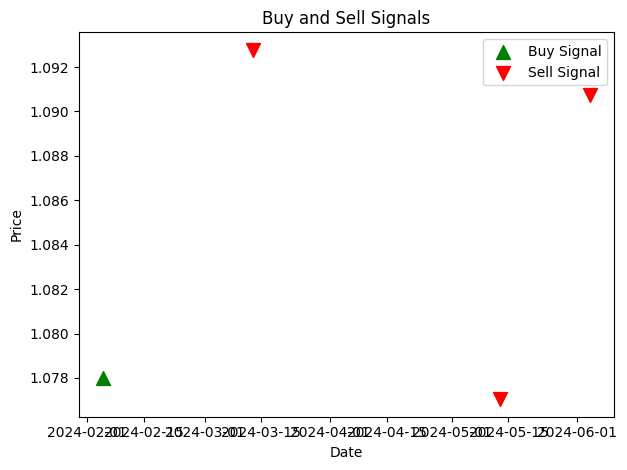

In [43]:
buy_signals = forex_data.index[np.where(np.array(signals) == 1)]
sell_signals = forex_data.index[np.where(np.array(signals) == -1)]
plt.scatter(buy_signals, forex_data['Close'].loc[buy_signals], marker='^', color='green', label='Buy Signal', s=100)
plt.scatter(sell_signals, forex_data['Close'].loc[sell_signals], marker='v', color='red', label='Sell Signal', s=100)

plt.title('Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()